In [178]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [208]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/c_boehm'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

nPoints = 10000
nClusters = 10
#t = pd.read_csv('../sample_data/data_10_10000.dat', sep=' ', header=None, names=['x', 'y'])
t = pd.read_csv(f'../sample_data/data_{nClusters:.0f}_{nPoints:.0f}.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [209]:
# 10 clusters, 100000 data points, coreThreshold = 2000
# -> coreThreshold = min { 10000, nPoints / (nClusters * 5) }

df = runDbscan(t, min(10000, int(nPoints / (nClusters * 5))), 1.4)

In [210]:
clusters = df[df['is_core']==1].groupby('cluster_id')

[]

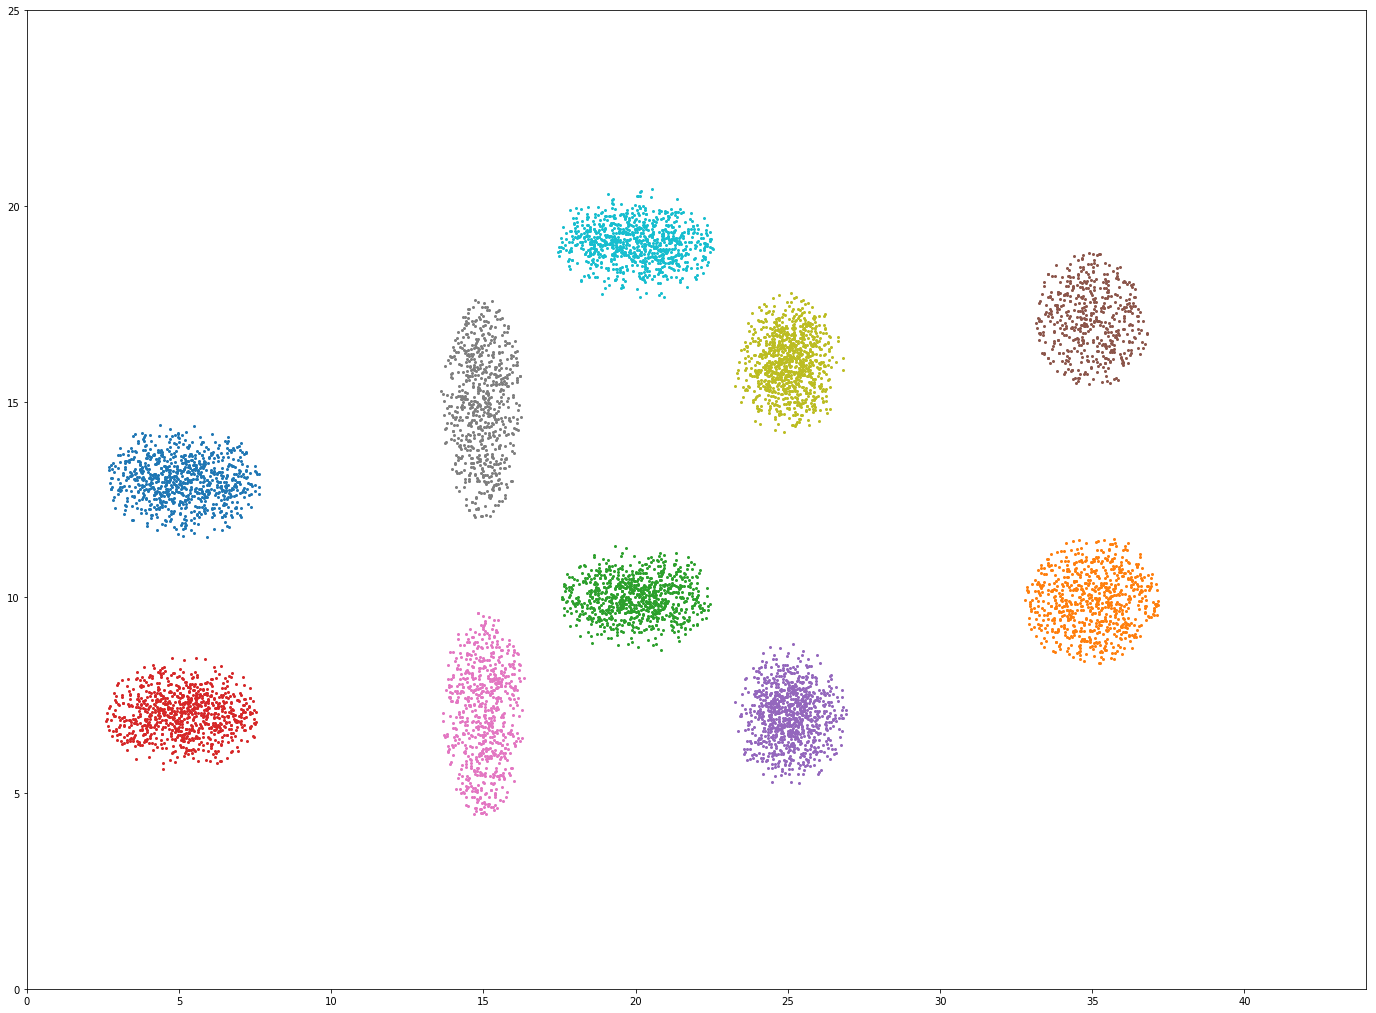

In [211]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    #if clusterId != -1:
    plt.scatter(grp['x'], grp['y'], s=4)
    plt.xlim(0,44)
    plt.ylim(0,25)
plt.plot()

[]

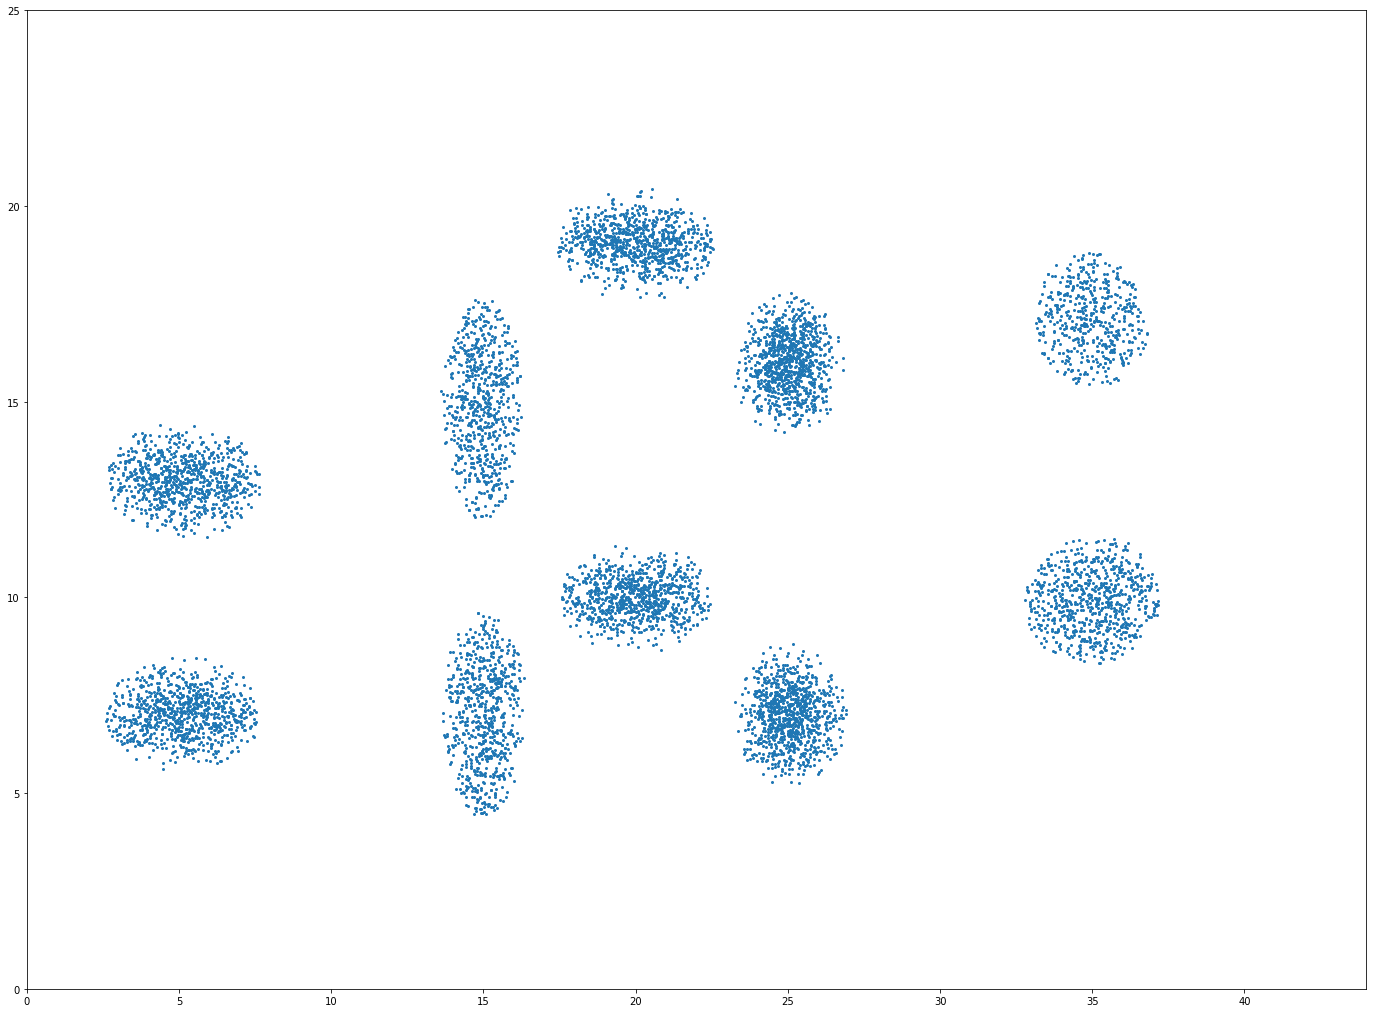

In [207]:
dffiltered = df[df['is_core']==1]
plt.figure(figsize=(24,18))
plt.scatter(dffiltered['x'], dffiltered['y'], s=4)
plt.xlim(0,44)
plt.ylim(0,25)
plt.plot()

In [183]:
set(df['cluster_id'])

{0,
 6144,
 8194,
 8195,
 2053,
 4102,
 8198,
 2058,
 8203,
 2067,
 4115,
 4118,
 2072,
 25,
 8222,
 32,
 8226,
 6179,
 8227,
 8228,
 8230,
 8232,
 8233,
 44,
 4140,
 47,
 48,
 6193,
 6194,
 4148,
 2102,
 6200,
 6201,
 2106,
 2107,
 6204,
 8248,
 8259,
 2116,
 4165,
 70,
 6213,
 73,
 2122,
 75,
 4172,
 6218,
 8267,
 8269,
 6226,
 8276,
 86,
 2134,
 6231,
 2138,
 8283,
 2140,
 6236,
 6245,
 4199,
 6248,
 2153,
 4201,
 6250,
 8297,
 4205,
 8299,
 2159,
 8301,
 4210,
 8306,
 8308,
 8311,
 4215,
 6266,
 4220,
 4221,
 6270,
 8317,
 8319,
 8321,
 2178,
 2179,
 4226,
 8322,
 2182,
 4233,
 6282,
 139,
 4235,
 4237,
 2190,
 2191,
 8330,
 4241,
 6290,
 147,
 4244,
 8344,
 153,
 8346,
 4251,
 8347,
 2205,
 2206,
 8350,
 6304,
 160,
 6306,
 2212,
 167,
 168,
 4267,
 2220,
 4268,
 4270,
 8367,
 179,
 4275,
 2230,
 2231,
 4278,
 4280,
 188,
 8383,
 4287,
 2242,
 6340,
 198,
 4294,
 2248,
 6343,
 8392,
 205,
 206,
 4301,
 8401,
 6354,
 211,
 4308,
 8408,
 4313,
 6361,
 8410,
 8186,
 4323,
 4325,
 637

In [ ]:
df